Tracer experiments bathymetry figures

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:

CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [4]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 


In [5]:
sns.set()
sns.set_style('white')
sns.set_context('paper')

The shelf-break isobath (sb=315.36 m) upstream of the canyon corresponds to the y-index 198
The corresponding index for z is   (z(29)=147.50 m)


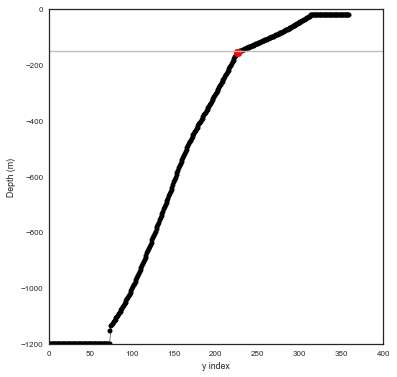

In [6]:
fig = plt.figure(figsize=(6,6))

CS = plt.plot(range(360),-bathy[:,120],'ko-',markersize=5,linewidth=0.5)
plt.plot(226,-bathy[226,120],'ro',markersize=8)
plt.axhline(y=z[29],xmin=0,xmax=360,linestyle='-', color='0.75')

plt.ylabel('Depth (m)')
plt.xlabel('y index')
print('The shelf-break isobath (sb=%.2f m) upstream of the canyon corresponds to the y-index 198' % bathy[198,120])
print('The corresponding index for z is   (z(29)=%.2f m)' % -z[29])

In [7]:
ix,iy = np.where((bathy>=146.8) & (bathy<=148.7))
print(np.shape(ix))


(326,)


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


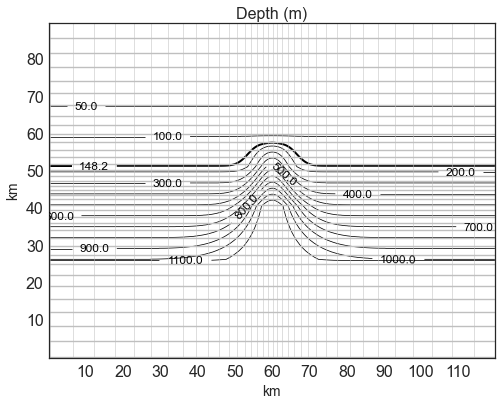

In [8]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(8,6))

plt.plot(xc[:,::10],yc[:,::10] ,'k',linewidth = 0.5,color = '0.75')

for ii in range(0,360,10):
    plt.axhline(y=yc[ii,1],xmin=0,xmax=360,linestyle='-', color='0.75')

lev = range(200,1200,100)

levels = [50,100,148.17]+lev
CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

    
plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)
